# Computing P-values and Confidence Intervals

## 📚 Learning Objectives

By completing this notebook, you will:
- Compute p-values for hypothesis tests
- Calculate confidence intervals for population parameters
- Interpret p-values and confidence intervals
- Understand the relationship between p-values and confidence intervals

## 🔗 Prerequisites

- ✅ Understanding of hypothesis testing
- ✅ Understanding of sampling and estimation
- ✅ Python, NumPy, SciPy knowledge

---

## Official Structure Reference

This notebook covers practical activities from **Course 03, Unit 5**:
- Computing p-values and confidence intervals
- **Source:** `DETAILED_UNIT_DESCRIPTIONS.md` - Unit 5 Practical Content

---

## Introduction

**P-values** measure evidence against the null hypothesis, and **confidence intervals** provide a range of plausible values for population parameters.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

print("✅ Libraries imported!")
print("\nComputing P-values and Confidence Intervals")
print("=" * 60)

✅ Libraries imported!

Computing P-values and Confidence Intervals


## Part 1: Computing P-values


Part 1: Computing P-values

Sample statistics:
  Sample mean: 48.1185
  Sample std: 9.0001
  Sample size: 30

Hypothesis Test: H0: μ = 50
  t-statistic: -1.1450
  p-value: 0.261564

Verification (scipy.stats.ttest_1samp):
  t-statistic: -1.1450
  p-value: 0.261564


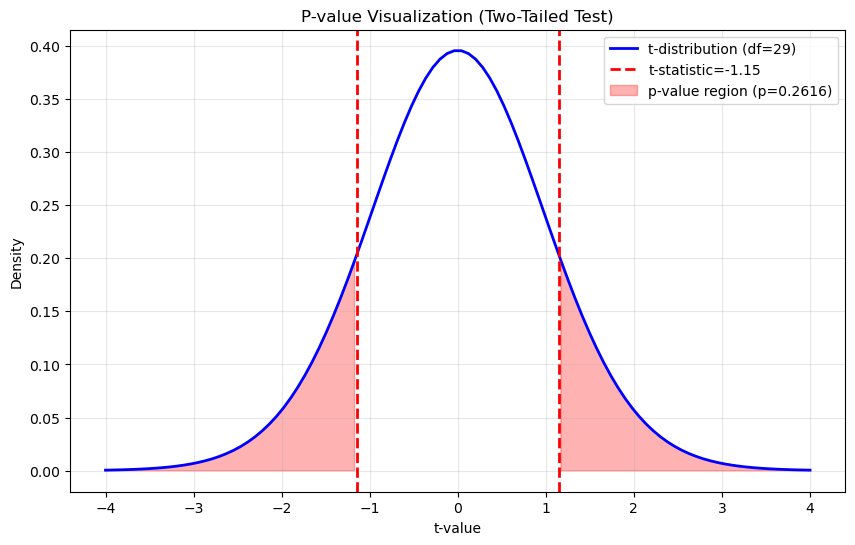


✅ P-value computed and visualized!


In [2]:
print("=" * 60)
print("Part 1: Computing P-values")
print("=" * 60)

# Generate sample data
np.random.seed(42)
true_mean = 50
sample_size = 30
sample = np.random.normal(true_mean, 10, sample_size)
sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)

print(f"\nSample statistics:")
print(f"  Sample mean: {sample_mean:.4f}")
print(f"  Sample std: {sample_std:.4f}")
print(f"  Sample size: {sample_size}")

# Test H0: μ = 50
hypothesized_mean = 50
t_statistic = (sample_mean - hypothesized_mean) / (sample_std / np.sqrt(sample_size))
df = sample_size - 1

# Compute p-value (two-tailed)
p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), df))

print(f"\nHypothesis Test: H0: μ = {hypothesized_mean}")
print(f"  t-statistic: {t_statistic:.4f}")
print(f"  p-value: {p_value:.6f}")

# Compare with scipy function
t_stat_scipy, p_value_scipy = stats.ttest_1samp(sample, hypothesized_mean)
print(f"\nVerification (scipy.stats.ttest_1samp):")
print(f"  t-statistic: {t_stat_scipy:.4f}")
print(f"  p-value: {p_value_scipy:.6f}")

# Visualize p-value
plt.figure(figsize=(10, 6))
x = np.linspace(-4, 4, 100)
t_dist = stats.t.pdf(x, df)
plt.plot(x, t_dist, 'b-', linewidth=2, label=f't-distribution (df={df})')
plt.axvline(t_statistic, color='r', linestyle='--', linewidth=2, label=f't-statistic={t_statistic:.2f}')
plt.axvline(-t_statistic, color='r', linestyle='--', linewidth=2)
plt.fill_between(x, 0, t_dist, where=(x <= -abs(t_statistic)) | (x >= abs(t_statistic)), 
                 alpha=0.3, color='red', label=f'p-value region (p={p_value:.4f})')
plt.xlabel('t-value')
plt.ylabel('Density')
plt.title('P-value Visualization (Two-Tailed Test)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("\n✅ P-value computed and visualized!")

## Part 2: Computing Confidence Intervals



Part 2: Computing Confidence Intervals

Confidence Interval for Mean (μ):
  Confidence level: 95.0%
  Sample mean: 48.1185
  Margin of error: 3.3607
  CI: [44.7579, 51.4792]

Verification (scipy.stats.t.interval):
  CI: [44.7579, 51.4792]

  90.0% CI: [45.3266, 50.9105]

  95.0% CI: [44.7579, 51.4792]

  99.0% CI: [43.5893, 52.6478]


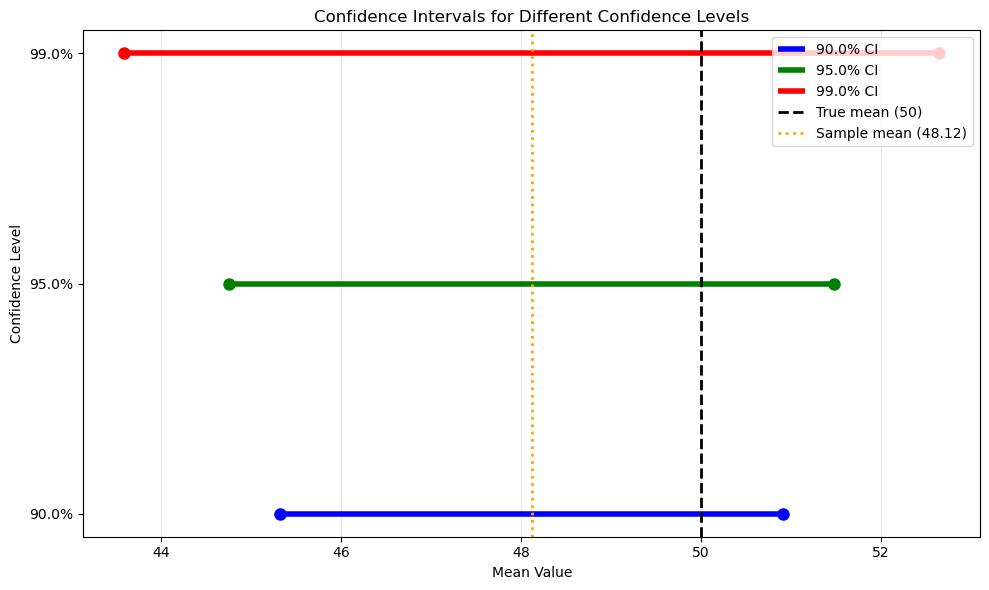


✅ Confidence intervals computed and visualized!


In [3]:
print("\n" + "=" * 60)
print("Part 2: Computing Confidence Intervals")
print("=" * 60)

# Confidence interval for mean (t-interval)
confidence_level = 0.95
alpha = 1 - confidence_level

# Calculate CI manually
t_critical = stats.t.ppf(1 - alpha/2, df)
margin_of_error = t_critical * (sample_std / np.sqrt(sample_size))
ci_lower = sample_mean - margin_of_error
ci_upper = sample_mean + margin_of_error

print(f"\nConfidence Interval for Mean (μ):")
print(f"  Confidence level: {confidence_level*100}%")
print(f"  Sample mean: {sample_mean:.4f}")
print(f"  Margin of error: {margin_of_error:.4f}")
print(f"  CI: [{ci_lower:.4f}, {ci_upper:.4f}]")

# Compare with scipy
ci_scipy = stats.t.interval(confidence_level, df, loc=sample_mean, scale=sample_std/np.sqrt(sample_size))
print(f"\nVerification (scipy.stats.t.interval):")
print(f"  CI: [{ci_scipy[0]:.4f}, {ci_scipy[1]:.4f}]")

# Multiple confidence levels
confidence_levels = [0.90, 0.95, 0.99]
cis = []

for cl in confidence_levels:
    alpha_cl = 1 - cl
    t_crit = stats.t.ppf(1 - alpha_cl/2, df)
    margin = t_crit * (sample_std / np.sqrt(sample_size))
    cis.append((sample_mean - margin, sample_mean + margin))
    print(f"\n  {cl*100}% CI: [{sample_mean - margin:.4f}, {sample_mean + margin:.4f}]")

# Visualize
plt.figure(figsize=(10, 6))
y_positions = np.arange(len(confidence_levels))
colors = ['blue', 'green', 'red']
for i, (cl, ci, color) in enumerate(zip(confidence_levels, cis, colors)):
    plt.hlines(i, ci[0], ci[1], colors=color, linewidth=4, label=f'{cl*100}% CI')
    plt.plot(ci, [i, i], 'o', color=color, markersize=8)
plt.axvline(true_mean, color='black', linestyle='--', linewidth=2, label=f'True mean ({true_mean})')
plt.axvline(sample_mean, color='orange', linestyle=':', linewidth=2, label=f'Sample mean ({sample_mean:.2f})')
plt.yticks(y_positions, [f'{cl*100}%' for cl in confidence_levels])
plt.xlabel('Mean Value')
plt.ylabel('Confidence Level')
plt.title('Confidence Intervals for Different Confidence Levels')
plt.legend()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print("\n✅ Confidence intervals computed and visualized!")

## Part 3: Relationship Between P-values and Confidence Intervals



Part 3: Relationship Between P-values and Confidence Intervals

Key Relationship:
  If 95% CI excludes the hypothesized value, then p < 0.05
  If 95% CI includes the hypothesized value, then p ≥ 0.05

Testing different hypothesized means:
  95% CI: [44.7579, 51.4792]

Hypothesized Value | In CI? | p-value | Reject H0?
    45.0         | Yes   | 0.0677 | No      
    48.0         | Yes   | 0.9430 | No      
    50.0         | Yes   | 0.2616 | No      
    52.0         | No    | 0.0251 | Yes     
    55.0         | No    | 0.0002 | Yes     


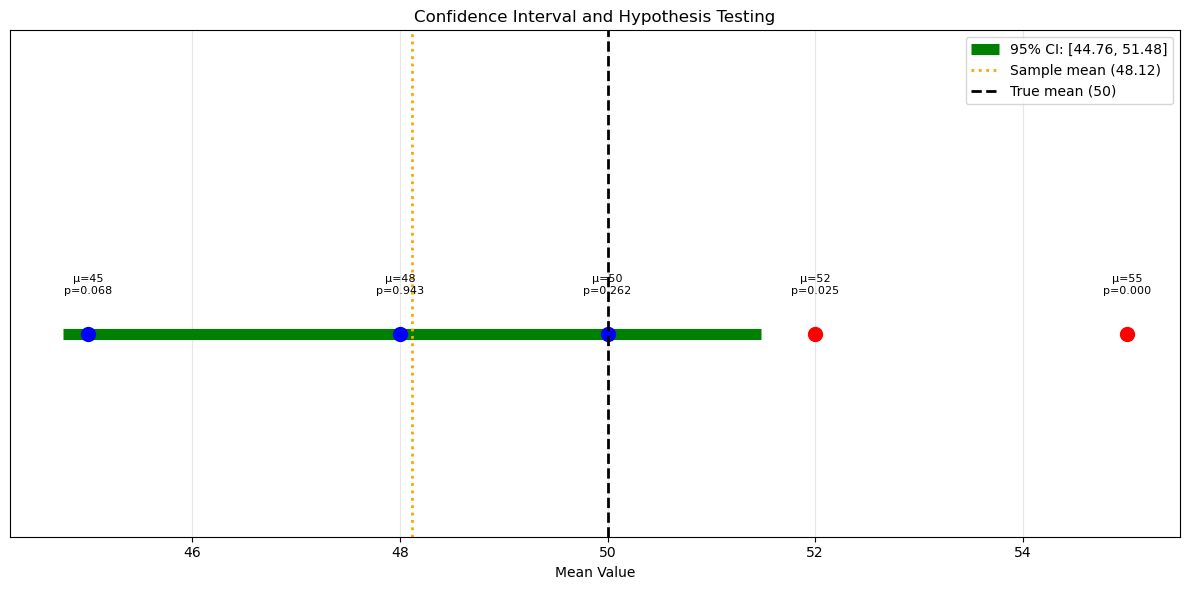


✅ Relationship between p-values and confidence intervals demonstrated!


In [4]:
print("\n" + "=" * 60)
print("Part 3: Relationship Between P-values and Confidence Intervals")
print("=" * 60)

# Relationship: If 95% CI excludes H0 value, p < 0.05
print("\nKey Relationship:")
print("  If 95% CI excludes the hypothesized value, then p < 0.05")
print("  If 95% CI includes the hypothesized value, then p ≥ 0.05")

# Demonstrate with different hypothesized values
hypothesized_values = [45, 48, 50, 52, 55]

print(f"\nTesting different hypothesized means:")
print(f"  95% CI: [{ci_lower:.4f}, {ci_upper:.4f}]")
print(f"\nHypothesized Value | In CI? | p-value | Reject H0?")

for h0_val in hypothesized_values:
    t_stat, p_val = stats.ttest_1samp(sample, h0_val)
    in_ci = ci_lower <= h0_val <= ci_upper
    reject = p_val < 0.05
    print(f"  {h0_val:6.1f}         | {'Yes' if in_ci else 'No':5} | {p_val:.4f} | {'Yes' if reject else 'No':8}")

# Visualize
plt.figure(figsize=(12, 6))
plt.hlines(0, ci_lower, ci_upper, colors='green', linewidth=8, label=f'95% CI: [{ci_lower:.2f}, {ci_upper:.2f}]')
for h0_val in hypothesized_values:
    t_stat, p_val = stats.ttest_1samp(sample, h0_val)
    color = 'red' if p_val < 0.05 else 'blue'
    plt.plot(h0_val, 0, 'o', color=color, markersize=10)
    plt.text(h0_val, 0.02, f'μ={h0_val}\np={p_val:.3f}', ha='center', fontsize=8)
plt.axvline(sample_mean, color='orange', linestyle=':', linewidth=2, label=f'Sample mean ({sample_mean:.2f})')
plt.axvline(true_mean, color='black', linestyle='--', linewidth=2, label=f'True mean ({true_mean})')
plt.xlabel('Mean Value')
plt.ylabel('')
plt.title('Confidence Interval and Hypothesis Testing')
plt.legend()
plt.grid(True, alpha=0.3, axis='x')
plt.ylim(-0.1, 0.15)
plt.yticks([])
plt.tight_layout()
plt.show()

print("\n✅ Relationship between p-values and confidence intervals demonstrated!")

## Summary

### Key Concepts:
1. **P-value**: Probability of observing data (or more extreme) if H0 is true
2. **Confidence Interval**: Range of plausible values for parameter
3. **Relationship**: 95% CI excludes H0 value ↔ p < 0.05
4. **Interpretation**: 
   - P-value: Evidence against H0 (lower = stronger evidence)
   - CI: Range of parameter values consistent with data

### Best Practices:
- Report both p-values and confidence intervals
- Don't interpret p-value as probability H0 is true
- Consider effect size, not just significance
- Use appropriate confidence level (usually 95%)

### Applications:
- Statistical inference
- Scientific reporting
- Decision making
- Quality control

**Reference:** Course 03, Unit 5: "Probability and Statistical Inference" - P-values and confidence intervals practical content